<h1><b>
Armin Zirak - 810194500 - Data Mining CA1 Report
</h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sb

In [2]:
orders = pd.read_excel('./data/onlineOrder/onlineOrder.xlsx')
orders.head(3)

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>InvoiceNo</th>
      <th>StockCode</th>
      <th>Description</th>
      <th>Quantity</th>
      <th>InvoiceDate</th>
      <th>UnitPrice</th>
      <th>CustomerID</th>
      <th>Country</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>536365</td>
      <td>85123A</td>
      <td>WHITE HANGING HEART T-LIGHT HOLDER</td>
      <td>6</td>
      <td>2010-12-01 08:26:00</td>
      <td>2.55</td>
      <td>17850.0</td>
      <td>United Kingdom</td>
    </tr>
    <tr>
      <th>1</th>
      <td>536365</td>
      <td>71053</td>
      <td>WHITE METAL LANTERN</td>
      <td>6</td>
      <td>2010-12-01 08:26:00</td>
      <td>3.39</td>
      <td>17850.0</td>
      <td>United Kingdom</td>
    </tr>
    <tr>
      <th>2</th>
      <td>536365</td>
      <td>84406B</td>
      <td>CREAM CUPID HEARTS COAT HANGER</td>
      <td>8</td>
      <td>2010-12-01 08:26:00</td>
      <td>2.75</td>
      <td>17850.0</td>
      <td>United Kingdom</td>
    </tr>
  </tbody>
</table>
</div>

In [3]:
orders.count()

InvoiceNo      541909
StockCode      541909
Description    540455
Quantity       541909
InvoiceDate    541909
UnitPrice      541909
CustomerID     406829
Country        541909
dtype: int64

<h1>Part 1</h1>

In [4]:
orders.describe(include='all')

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>InvoiceNo</th>
      <th>StockCode</th>
      <th>Description</th>
      <th>Quantity</th>
      <th>InvoiceDate</th>
      <th>UnitPrice</th>
      <th>CustomerID</th>
      <th>Country</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>count</th>
      <td>541909.0</td>
      <td>541909</td>
      <td>540455</td>
      <td>541909.000000</td>
      <td>541909</td>
      <td>541909.000000</td>
      <td>406829.000000</td>
      <td>541909</td>
    </tr>
    <tr>
      <th>unique</th>
      <td>25900.0</td>
      <td>4070</td>
      <td>4223</td>
      <td>NaN</td>
      <td>23260</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>38</td>
    </tr>
    <tr>
      <th>top</th>
      <td>573585.0</td>
      <td>85123A</td>
      <td>WHITE HANGING HEART T-LIGHT HOLDER</td>
      <td>NaN</td>
      <td>2011-10-31 14:41:00</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>United Kingdom</td>
    </tr>
    <tr>
      <th>freq</th>
      <td>1114.0</td>
      <td>2313</td>
      <td>2369</td>
      <td>NaN</td>
      <td>1114</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>495478</td>
    </tr>
    <tr>
      <th>first</th>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>2010-12-01 08:26:00</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>last</th>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>2011-12-09 12:50:00</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>mean</th>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>9.552250</td>
      <td>NaN</td>
      <td>4.611114</td>
      <td>15287.690570</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>std</th>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>218.081158</td>
      <td>NaN</td>
      <td>96.759853</td>
      <td>1713.600303</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>min</th>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>-80995.000000</td>
      <td>NaN</td>
      <td>-11062.060000</td>
      <td>12346.000000</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>25%</th>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>1.000000</td>
      <td>NaN</td>
      <td>1.250000</td>
      <td>13953.000000</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>50%</th>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>3.000000</td>
      <td>NaN</td>
      <td>2.080000</td>
      <td>15152.000000</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>75%</th>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>10.000000</td>
      <td>NaN</td>
      <td>4.130000</td>
      <td>16791.000000</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>max</th>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>80995.000000</td>
      <td>NaN</td>
      <td>38970.000000</td>
      <td>18287.000000</td>
      <td>NaN</td>
    </tr>
  </tbody>
</table>
</div>

In [5]:
orders.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [6]:
[orders['InvoiceDate'].min(), orders['InvoiceDate'].max()]

[Timestamp('2010-12-01 08:26:00'), Timestamp('2011-12-09 12:50:00')]

<h3> Result Note </h3>

InvoiceNo -> Categorical <br>
StockCode -> Categorical <br>
Description -> Categorical </br>
Quantity -> Numerical Min: -80995, Max: 80995 <br>
InvoiceDate -> Numerical Min: '2010-12-01 08:26:00', Max: '2011-12-09 12:50:00' <br>
UntiPrice -> Numerical Min: -11062, Max: 38970 <br>
CustomerId -> Categorical Min: 12346, Max: 18278 <br>
Country -> Categorical <br>



<h2> Part 2 </h2>

In [8]:
orders['year'] = orders['InvoiceDate'].map(lambda x: x.year)
orders['day'] = orders['InvoiceDate'].map(lambda x: x.day)
orders['month'] = orders['InvoiceDate'].map(lambda x: x.month)
orders['hour'] = orders['InvoiceDate'].map(lambda x: x.hour)
orders.head(2)

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>InvoiceNo</th>
      <th>StockCode</th>
      <th>Description</th>
      <th>Quantity</th>
      <th>InvoiceDate</th>
      <th>UnitPrice</th>
      <th>CustomerID</th>
      <th>Country</th>
      <th>year</th>
      <th>day</th>
      <th>month</th>
      <th>hour</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>536365</td>
      <td>85123A</td>
      <td>WHITE HANGING HEART T-LIGHT HOLDER</td>
      <td>6</td>
      <td>2010-12-01 08:26:00</td>
      <td>2.55</td>
      <td>17850.0</td>
      <td>United Kingdom</td>
      <td>2010</td>
      <td>1</td>
      <td>12</td>
      <td>8</td>
    </tr>
    <tr>
      <th>1</th>
      <td>536365</td>
      <td>71053</td>
      <td>WHITE METAL LANTERN</td>
      <td>6</td>
      <td>2010-12-01 08:26:00</td>
      <td>3.39</td>
      <td>17850.0</td>
      <td>United Kingdom</td>
      <td>2010</td>
      <td>1</td>
      <td>12</td>
      <td>8</td>
    </tr>
  </tbody>
</table>
</div>

<h3>Part 3</h3>

In [9]:
orders['totalPrice'] = orders['Quantity'] * orders['UnitPrice']
orders.head(2)

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>InvoiceNo</th>
      <th>StockCode</th>
      <th>Description</th>
      <th>Quantity</th>
      <th>InvoiceDate</th>
      <th>UnitPrice</th>
      <th>CustomerID</th>
      <th>Country</th>
      <th>year</th>
      <th>day</th>
      <th>month</th>
      <th>hour</th>
      <th>totalPrice</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>536365</td>
      <td>85123A</td>
      <td>WHITE HANGING HEART T-LIGHT HOLDER</td>
      <td>6</td>
      <td>2010-12-01 08:26:00</td>
      <td>2.55</td>
      <td>17850.0</td>
      <td>United Kingdom</td>
      <td>2010</td>
      <td>1</td>
      <td>12</td>
      <td>8</td>
      <td>15.30</td>
    </tr>
    <tr>
      <th>1</th>
      <td>536365</td>
      <td>71053</td>
      <td>WHITE METAL LANTERN</td>
      <td>6</td>
      <td>2010-12-01 08:26:00</td>
      <td>3.39</td>
      <td>17850.0</td>
      <td>United Kingdom</td>
      <td>2010</td>
      <td>1</td>
      <td>12</td>
      <td>8</td>
      <td>20.34</td>
    </tr>
  </tbody>
</table>
</div>

<h1> Part 4 </h1>

In [10]:
x = orders['hour']
plt.hist(x)
plt.axvline(x.mean(), color='black', linestyle='dashed', linewidth=2, label='mean')
plt.axvline(x.median(), color='r', linestyle='dashed', linewidth=2, label='median')
plt.axvline(stats.mode(x)[0][0], color='y', linestyle='dashed', linewidth=2, label='mode')
plt.legend()
plt.xlabel('hour')
plt.ylabel('count')
plt.title('Hour Histogram')

Text(0.5, 1.0, 'Hour Histogram')

In [11]:
mean = x.mean()
median = x.median()
mode = stats.mode(x)[0][0]
skew = stats.skew(x)
[mean, median, mode, skew]

[13.078729085510666, 13.0, 12, 0.0055453761732582405]

<h3>Result Note</h3>
mean -> black line (13.07) <br>
median -> red line (13.0) <br>
mode -> yellow line (12) <br>
skewness -> positive (0.005) <br>
<p dir='rtl'>
مدین بین مد و میانگین است و چونگی مثبت می باشد.
</p>


<h1> Part 5</h1>

<h3> Pie Chart </h3>

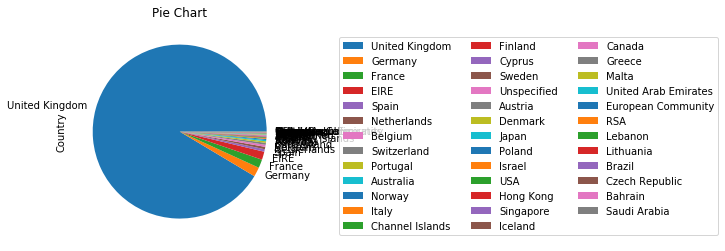

In [12]:
orders['Country'].value_counts().plot(kind='pie').set_title('Pie Chart')
plt.legend(loc='lower right', bbox_to_anchor=(3,0), ncol=3)

<h3> Bar Plot </h3>

Text(0.5, 1.0, 'Bar Plot')

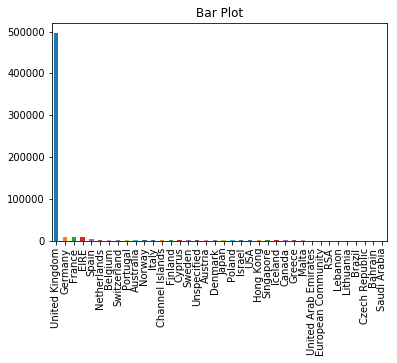

In [13]:
orders['Country'].value_counts().plot(kind='bar').set_title('Bar Plot')

<h3> Result Note </h3>
کشورها عمدتا بریتانیا هستند و از مابقی کشورها هر کدام تعداد کمی وجود دارد

<h1> Part 6 </h1>

Text(0.5, 1.0, 'Day BoxPlot')

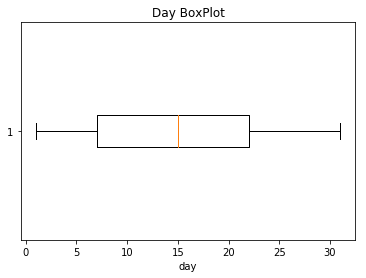

In [14]:
green_diamond = dict(markerfacecolor='r', marker='s')
plt.boxplot(orders['day'], flierprops=green_diamond, vert=False, whis=1.5)
plt.xlabel('day')
plt.title('Day BoxPlot')
# orders['Quantity'].describe()

Text(0.5, 0, 'totalPrice')

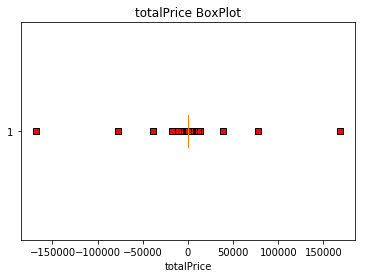

In [16]:
green_diamond = dict(markerfacecolor='r', marker='s')
plt.boxplot(orders['totalPrice'], flierprops=green_diamond, vert=False, whis=1.5)
plt.title('totalPrice BoxPlot')
plt.xlabel('totalPrice')

<h3> Result Note </h3>
<p dir='rtl'>
داده پرتی در این ویژگی اول وجود نداشته و تمام داده ها داخل بازه ۱.۵ برابر هستند.
اما در ویژگی دوم برعکس هست و به دلیل چگالی زیاد داده ها در یک بازه بسیار کوتاه و وجود داده های خیلی پرت در فاصله زیاد عملا باکس اصلی دیده نمی شود. نقاط قرمز همه داده پرت هستند که در فاصله دور از باکس وجود دارند.
</p>


<h1> Part 7 </h1>

Text(0.5, 1.0, 'TotalPrice / Quantity Scatter Plot')

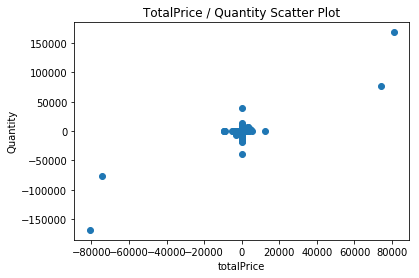

In [18]:
x = orders['Quantity']
y = orders['totalPrice']
plt.scatter(x, y)
np.corrcoef(x, y)
plt.xlabel('totalPrice')
plt.ylabel('Quantity')
plt.title('TotalPrice / Quantity Scatter Plot')

<h3> Result Note </h3>
<p dir='rtl'>
تنها ویژگی هایی که با هم ارتباط کافی داشتند مقدار و قیمت نهایی بودند (که بر اساس هم ساخته شده اند) ارتباط آن ها در نمودار مشخص است و ضریب کوریلیشاشن نیز ۰.۸۸۶۶ است.
</p>


<h1> Part 8 </h1>

In [19]:
h = orders.groupby('hour').sum()['Quantity']
# plt.scatter(h)

Text(0.5, 0, 'hour')

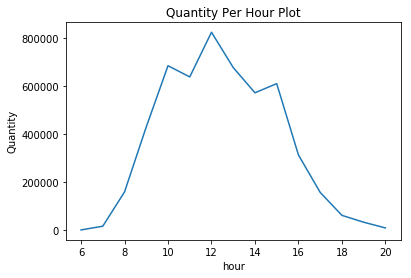

In [20]:
h.plot()
plt.title('Quantity Per Hour Plot')
plt.ylabel('Quantity')
plt.xlabel('hour')

In [21]:
orders.Country.unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

Text(0.5, 0, 'hour')

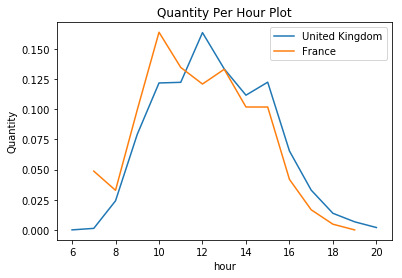

In [22]:
for country in orders.Country.unique()[:2]:
    country_order = orders[orders.Country == country]
    all_h = country_order['Quantity'].sum()
    h = country_order.groupby('hour')['Quantity'].sum()
    (h/all_h).plot()
plt.legend(orders.Country.unique(), bbox_to_anchor=(1,1), loc='upper right', ncol=1)
plt.title('Quantity Per Hour Plot')
plt.ylabel('Quantity')
plt.xlabel('hour')

<h3> Result Note </h3>
<p dir='rtl'>
روابط مختلف را با هم بررسی کردم با توجه به قناس بودن داده ها بهترین نتایجی که گرفتم موارد بالا بودند.
در اولی نمودار فروش در ساعات مختلف روز بررسی شده که در میانه آن بیشترین است و در دومی میزان فروش در ساعات مختلف کشورهای متفاوت با هم بررسی شده است.
</p>